In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import  *
from keras.applications import EfficientNetB5
from keras.layers import AveragePooling2D
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import  img_to_array
from keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import shuffle
import os
os.environ['TF_ENABLE_GPU_GARBAGE_COLLECTION'] = 'false'

In [2]:
trainPath="/home/alp/Desktop/deep/Data/train"
testPath="/home/alp/Desktop/deep/Data/test"
valPath="/home/alp/Desktop/deep/Data/val"

In [3]:
trainDataGen=ImageDataGenerator(rescale=1./255,
    horizontal_flip=True,
    vertical_flip=False,
    rotation_range=0.3,
    zoom_range=0.1,
    shear_range=0.05,)
testDataGen=ImageDataGenerator(rescale=1./255)
valDataGen=ImageDataGenerator(rescale=1./255,validation_split=0.9999999999999)

trainGen=trainDataGen.flow_from_directory(
    trainPath,
    target_size=(224,224),
    color_mode='grayscale',
    class_mode='categorical',
    seed = 131,
    batch_size=4,
    subset='training')

testGen=testDataGen.flow_from_directory(
    testPath,
    target_size=(224,224),
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False,
    batch_size=1)

valGen=valDataGen.flow_from_directory(
    valPath,
    target_size=(224,224),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=4,
    subset='validation')

print("Test",testGen.samples)
print("Train",trainGen.samples)
print("Validation",valGen.samples)
print(testGen.class_indices) 

Found 7364 images belonging to 4 classes.
Found 924 images belonging to 4 classes.
Found 916 images belonging to 4 classes.
Test 924
Train 7364
Validation 916
{'COVID-19': 0, 'Normal': 1, 'Pneumonia-Bacterial': 2, 'Pneumonia-Viral': 3}


In [ ]:
from tensorflow.keras.applications import EfficientNetB5
from keras.models import Model
base_model =  EfficientNetB5(weights='imagenet',input_shape=(456,456,3),include_top=False)
for layer in base_model.layers[8:299]:
  layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32,activation='relu')(x)
out = Dense(4,activation='softmax')(x)
ef = Model(inputs=base_model.inputs,outputs=out)
ef.summary()
print(len(ef.layers))
for layer in ef.layers:
  print(layer.name,layer.trainable)

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 456, 456, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_16 (Rescaling)       (None, 456, 456, 3)  0           ['input_17[0][0]']               
                                                                                                  
 normalization_16 (Normalizatio  (None, 456, 456, 3)  7          ['rescaling_16[0][0]']           
 n)                                                                                               
                                                                                           

In [ ]:
from keras.callbacks import ModelCheckpoint
ModelCheckpoint(filepath="best_model_3.h5",monitor='val_loss',save_best_only=True)
ef.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history_10=ef.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//4,
    validation_data=valGen,
    epochs=35,
    validation_steps=valGen.samples//4
)

Epoch 1/35
1841/1841 [==============================] - 388s 204ms/step - loss: 0.7173 - accuracy: 0.7093 - val_loss: 0.6736 - val_accuracy: 0.7522
Epoch 2/35
1841/1841 [==============================] - 423s 230ms/step - loss: 0.4844 - accuracy: 0.7914 - val_loss: 0.7435 - val_accuracy: 0.7041
Epoch 3/35
1841/1841 [==============================] - 475s 258ms/step - loss: 0.4563 - accuracy: 0.8034 - val_loss: 1.3105 - val_accuracy: 0.4258
Epoch 4/35
1841/1841 [==============================] - 475s 258ms/step - loss: 0.4107 - accuracy: 0.8229 - val_loss: 0.5173 - val_accuracy: 0.8002
Epoch 5/35
1841/1841 [==============================] - 476s 258ms/step - loss: 0.3842 - accuracy: 0.8356 - val_loss: 1.6218 - val_accuracy: 0.2893
Epoch 6/35
1841/1841 [==============================] - 475s 258ms/step - loss: 0.3660 - accuracy: 0.8422 - val_loss: 0.5507 - val_accuracy: 0.7609
Epoch 7/35
1841/1841 [==============================] - 475s 258ms/step - loss: 0.3542 - accuracy: 0.8451 - val_

In [ ]:
scores=ef.evaluate(testGen,batch_size=1)
print("Loss:",scores[0])
print("Accuracy:",scores[1]*100)

924/924 [==============================] - 26s 28ms/step - loss: 1.2374 - accuracy: 0.6136
Loss: 1.2374083995819092
Accuracy: 61.36363744735718


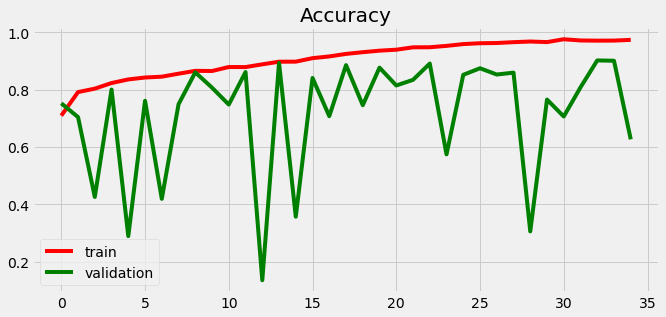

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history_10.history["accuracy"],color='r',label='train')
plt.plot(history_10.history["val_accuracy"],color='g',label='validation')
plt.legend(loc='best')

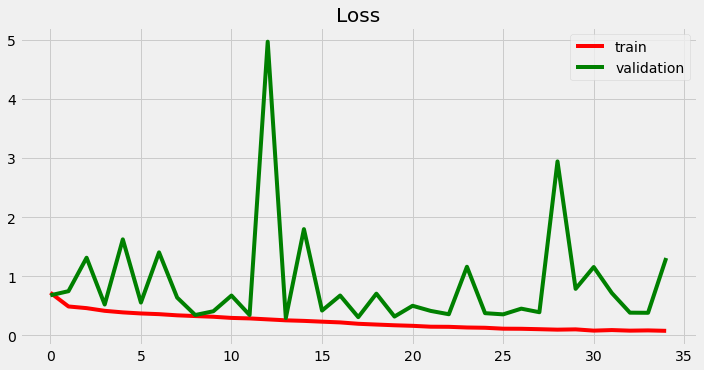

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.subplot(212)
plt.title("Loss")
plt.plot(history_10.history["loss"],color='r',label='train')
plt.plot(history_10.history["val_loss"],color='g',label='validation')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       129
           1       0.96      0.58      0.73       327
           2       0.51      0.75      0.61       301
           3       0.42      0.13      0.20       167

    accuracy                           0.61       924
   macro avg       0.61      0.62      0.56       924
weighted avg       0.66      0.61      0.59       924

[[129   0   0   0]
 [ 23 190  95  19]
 [ 60   4 226  11]
 [ 22   3 120  22]]


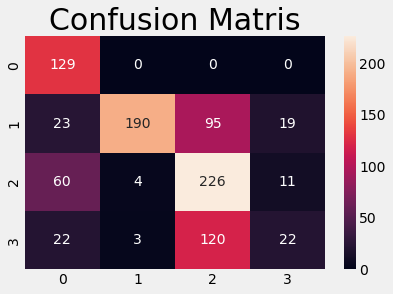

In [ ]:
Y_pred_ = ef.predict_generator(testGen,testGen.samples // 1+1)
y_pred_ = np.argmax(Y_pred_, axis=1)
categories = ["0", "1","2","3"]
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(testGen.classes, y_pred_, target_names=categories))
conf_ = confusion_matrix(testGen.classes,y_pred_) 
print(conf_)
import seaborn as sns
plt.title('Confusion Matris', fontsize = 30)
sns.heatmap(conf_, annot = True,fmt="d")
plt.show()


In [4]:
from tensorflow.keras.applications import EfficientNetB5
from keras.models import Model
base_model =  EfficientNetB5(weights='imagenet',input_shape=(456,456,3),include_top=False)
for layer in base_model.layers[0:108]:
  layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32,activation='relu')(x)
out = Dense(4,activation='softmax')(x)
eff = Model(inputs=base_model.inputs,outputs=out)
eff.summary()
print(len(eff.layers))
for layer in eff.layers:
  print(layer.name,layer.trainable)

2022-06-16 19:05:34.623219: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 19:05:34.630764: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 19:05:34.630918: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 19:05:34.631385: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 456, 456, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 456, 456, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 456, 456, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 456, 456, 3)  0           ['normalization[0][0]']      

In [7]:
from keras.callbacks import ModelCheckpoint
callback=ModelCheckpoint(filepath="best_model_3.h5",monitor='val_loss',save_best_only=True)
eff.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history_10=eff.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//4,
    validation_data=valGen,
    epochs=35,
    validation_steps=valGen.samples//4,
    callbacks=callback
)


Epoch 1/35
1841/1841 [==============================] - 330s 171ms/step - loss: 0.3953 - accuracy: 0.8347 - val_loss: 0.3777 - val_accuracy: 0.8461
Epoch 2/35
1841/1841 [==============================] - 310s 169ms/step - loss: 0.3831 - accuracy: 0.8434 - val_loss: 0.5240 - val_accuracy: 0.7915
Epoch 3/35
1841/1841 [==============================] - 313s 170ms/step - loss: 0.3740 - accuracy: 0.8438 - val_loss: 0.3571 - val_accuracy: 0.8515
Epoch 4/35
1841/1841 [==============================] - 311s 169ms/step - loss: 0.3643 - accuracy: 0.8494 - val_loss: 0.3592 - val_accuracy: 0.8548
Epoch 5/35
1841/1841 [==============================] - 309s 168ms/step - loss: 0.3607 - accuracy: 0.8474 - val_loss: 0.3845 - val_accuracy: 0.8352
Epoch 6/35
1841/1841 [==============================] - 311s 169ms/step - loss: 0.3538 - accuracy: 0.8548 - val_loss: 0.3601 - val_accuracy: 0.8439
Epoch 7/35
1841/1841 [==============================] - 313s 170ms/step - loss: 0.3400 - accuracy: 0.8582 - val_

In [8]:
scores=eff.evaluate(testGen,batch_size=1)
print("Loss:",scores[0])
print("Accuracy:",scores[1]*100)

924/924 [==============================] - 23s 24ms/step - loss: 0.4144 - accuracy: 0.8528
Loss: 0.4143528342247009
Accuracy: 85.28138399124146


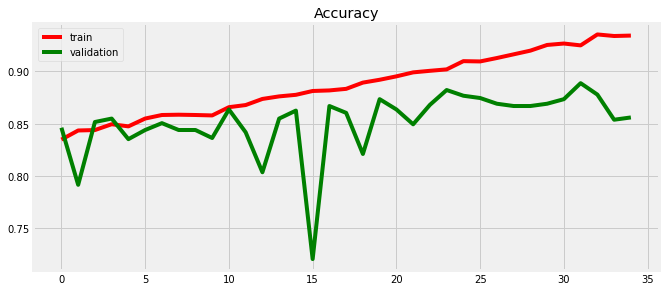

In [9]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history_10.history["accuracy"],color='r',label='train')
plt.plot(history_10.history["val_accuracy"],color='g',label='validation')
plt.legend(loc='best')

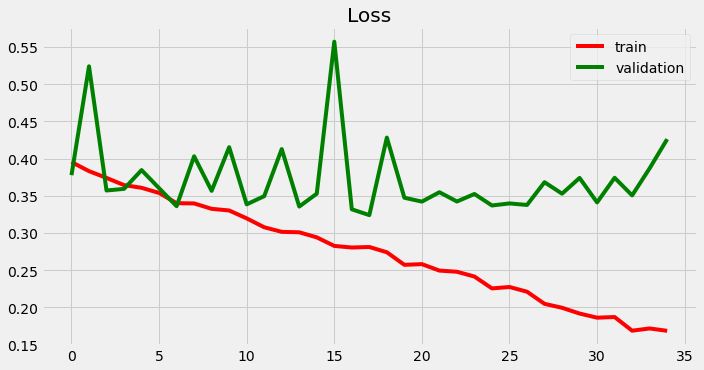

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.subplot(212)
plt.title("Loss")
plt.plot(history_10.history["loss"],color='r',label='train')
plt.plot(history_10.history["val_loss"],color='g',label='validation')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       129
           1       0.96      0.98      0.97       327
           2       0.85      0.74      0.79       301
           3       0.61      0.69      0.65       167

    accuracy                           0.85       924
   macro avg       0.84      0.85      0.84       924
weighted avg       0.86      0.85      0.85       924

[[129   0   0   0]
 [  0 321   0   6]
 [  6   5 222  68]
 [  5   8  38 116]]


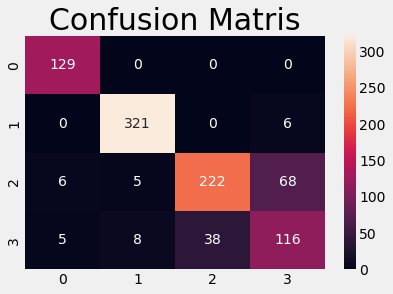

In [11]:
Y_pred = eff.predict_generator(testGen,testGen.samples // 1+1)
y_pred = np.argmax(Y_pred, axis=1)
categories = ["0", "1","2","3"]
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(testGen.classes, y_pred, target_names=categories))
conf = confusion_matrix(testGen.classes,y_pred) 
print(conf)
import seaborn as sns
plt.title('Confusion Matris', fontsize = 30)
sns.heatmap(conf, annot = True,fmt="d")
plt.show()


In [12]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("f1-score:",f1_score(testGen.classes, y_pred,average='macro'))
print("precision:",precision_score(testGen.classes, y_pred,average='macro'))
print("accuracy:",accuracy_score(testGen.classes, y_pred))
print("recall:",recall_score(testGen.classes, y_pred,average='macro'))

f1-score: 0.8429168185397027
precision: 0.836719721343894
accuracy: 0.8528138528138528
recall: 0.8534509207072764


In [15]:
from tensorflow.keras.applications import EfficientNetB5
from keras.models import Model
base_model =  EfficientNetB5(weights='imagenet',input_shape=(456,456,3),include_top=False)
for layer in base_model.layers[0:50]:
  layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32,activation='relu')(x)
out = Dense(4,activation='softmax')(x)
eff2 = Model(inputs=base_model.inputs,outputs=out)
eff2.summary()
print(len(eff2.layers))
for layer in eff2.layers:
  print(layer.name,layer.trainable)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 456, 456, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 456, 456, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 456, 456, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                            

In [16]:
from keras.callbacks import ModelCheckpoint
callback2=ModelCheckpoint(filepath="best_model_4.h5",monitor='val_loss',save_best_only=True)
eff2.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history_11=eff2.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//4,
    validation_data=valGen,
    epochs=35,
    validation_steps=valGen.samples//4,
    callbacks=callback2
)

Epoch 1/35
1841/1841 [==============================] - 425s 223ms/step - loss: 0.7480 - accuracy: 0.6988 - val_loss: 0.4798 - val_accuracy: 0.7849
Epoch 2/35
1841/1841 [==============================] - 399s 217ms/step - loss: 0.5538 - accuracy: 0.7758 - val_loss: 0.5499 - val_accuracy: 0.7740
Epoch 3/35
1841/1841 [==============================] - 404s 219ms/step - loss: 0.4831 - accuracy: 0.7978 - val_loss: 0.4111 - val_accuracy: 0.8515
Epoch 4/35
1841/1841 [==============================] - 403s 219ms/step - loss: 0.4585 - accuracy: 0.8122 - val_loss: 0.3861 - val_accuracy: 0.8406
Epoch 5/35
1841/1841 [==============================] - 402s 218ms/step - loss: 0.4309 - accuracy: 0.8221 - val_loss: 0.4089 - val_accuracy: 0.8352
Epoch 6/35
1841/1841 [==============================] - 408s 222ms/step - loss: 0.4234 - accuracy: 0.8252 - val_loss: 0.3672 - val_accuracy: 0.8515
Epoch 7/35
1841/1841 [==============================] - 400s 217ms/step - loss: 0.4069 - accuracy: 0.8290 - val_

In [9]:
eff2=keras.models.load_model('best_model_4.h5')

In [10]:
scores=eff2.evaluate(testGen,batch_size=1)
print("Loss:",scores[0])
print("Accuracy:",scores[1]*100)

924/924 [==============================] - 25s 24ms/step - loss: 0.2825 - accuracy: 0.8939
Loss: 0.28246617317199707
Accuracy: 89.39393758773804


9 gündür açık tuttuğum bilgisayarım elektirik kesintisi sebebiyle kapandı. h5 formatında history kayıtlı olmadığı için en iyi aldığım sonucun csv dosyasını kendi elimle hazırlayıp grafiğini çizdirdim.

In [4]:
EfficentNet2= pd.read_csv('/home/alp/Desktop/deep/eff2eff2.csv', dtype=str)
def csvToList(csvFile):
    list_of_rows = [list(row) for row in csvFile.values]
    accuracy_list = []
    loss_list =[]
    val_accuracy_list = []
    val_loss_list = []
    for i in list_of_rows:
        for j in range(4):
            if j==0:
                loss_list.append(float(i[j]))
            elif j==1:
                accuracy_list.append(float(i[j]))
            elif j ==2:
                val_loss_list.append(float(i[j]))
            elif j==3:
                val_accuracy_list.append(float(i[j]))
    return loss_list, accuracy_list, val_loss_list, val_accuracy_list

# EfficentNet.head
loss_list, accuracy_list, val_loss_list, val_accuracy_list = csvToList(EfficentNet2)
loss_list = np.array(loss_list)
print(loss_list)

def plot(loss_list, accuracy_list, val_loss_list, val_accuracy_list,modelName):
    plt.subplot(211)

    plt.title("Accuracy")
    plt.plot(accuracy_list,color='r',label='train')
    plt.plot(val_accuracy_list,color='b',label='validation')
    plt.legend(loc="best")
    plt.subplot(212)
    plt.title("Loss")
    plt.plot(loss_list,color='r',label='train')
    plt.plot(val_loss_list,color='b',label='validation')
    plt.legend(loc='best')
    plt.tight_layout()
    #plt.show()
    plt.savefig(modelName+'-training.png')
    plt.savefig(modelName+'-training.pdf')

[0.748  0.5538 0.4831 0.4585 0.4309 0.4234 0.4069 0.3881 0.3739 0.3747
 0.3667 0.3558 0.3443 0.3425 0.3273 0.3308 0.3141 0.3077 0.3089 0.3088
 0.2898 0.2875 0.2767 0.2698 0.2701 0.2592 0.2528 0.2338 0.2375 0.2223
 0.2199 0.2075 0.2021 0.1942 0.1811]


In [5]:
loss_list, accuracy_list, val_loss_list, val_accuracy_list = csvToList(EfficentNet2)

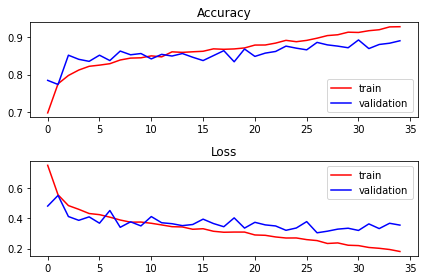

In [6]:
plot(loss_list, accuracy_list, val_loss_list, val_accuracy_list,"EfficentNet")

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       129
           1       0.98      0.99      0.98       327
           2       0.86      0.84      0.85       301
           3       0.72      0.72      0.72       167

    accuracy                           0.89       924
   macro avg       0.89      0.89      0.89       924
weighted avg       0.89      0.89      0.89       924

[[128   0   1   0]
 [  0 323   0   4]
 [  0   3 254  44]
 [  1   3  42 121]]


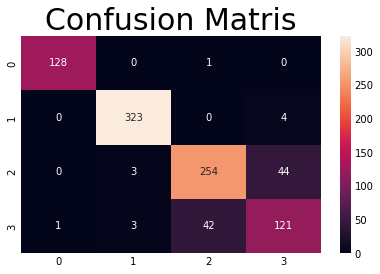

In [12]:
Y_pred_2 = eff2.predict_generator(testGen,testGen.samples // 1+1)
y_pred_2 = np.argmax(Y_pred_2, axis=1)
categories = ["0", "1","2","3"]
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(testGen.classes, y_pred_2, target_names=categories))
conf_2 = confusion_matrix(testGen.classes,y_pred_2) 
print(conf_2)
import seaborn as sns
plt.title('Confusion Matris', fontsize = 30)
sns.heatmap(conf_2, annot = True,fmt="d")
plt.show()


In [13]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("f1-score:",f1_score(testGen.classes, y_pred_2,average='macro'))
print("precision:",precision_score(testGen.classes, y_pred_2,average='macro'))
print("accuracy:",accuracy_score(testGen.classes, y_pred_2))
print("recall:",recall_score(testGen.classes, y_pred_2,average='macro'))

f1-score: 0.8866851456434431
precision: 0.8863015416321091
accuracy: 0.8939393939393939
recall: 0.8871050912287406


In [25]:
from tensorflow.keras.applications import EfficientNetB5
from keras.models import Model
base_model =  EfficientNetB5(weights='imagenet',input_shape=(456,456,3),include_top=False)
for layer in base_model.layers[0:150]:
  layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32,activation='relu')(x)
out = Dense(4,activation='softmax')(x)
eff3 = Model(inputs=base_model.inputs,outputs=out)
eff3.summary()
print(len(eff3.layers))
for layer in eff3.layers:
  print(layer.name,layer.trainable)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 456, 456, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_4 (Rescaling)        (None, 456, 456, 3)  0           ['input_5[0][0]']                
                                                                                                  
 normalization_4 (Normalization  (None, 456, 456, 3)  7          ['rescaling_4[0][0]']            
 )                                                                                                
                                                                                            

In [26]:
from keras.callbacks import ModelCheckpoint
callback4=ModelCheckpoint(filepath="best_model_6.h5",monitor='val_loss',save_best_only=True)
eff3.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history_12=eff3.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//4,
    validation_data=valGen,
    epochs=45,
    validation_steps=valGen.samples//4,
    callbacks=callback4
)

Epoch 1/45
1841/1841 [==============================] - 301s 156ms/step - loss: 0.8632 - accuracy: 0.6463 - val_loss: 0.6019 - val_accuracy: 0.7609
Epoch 2/45
1841/1841 [==============================] - 286s 155ms/step - loss: 0.6004 - accuracy: 0.7455 - val_loss: 0.4616 - val_accuracy: 0.8199
Epoch 3/45
1841/1841 [==============================] - 286s 156ms/step - loss: 0.5507 - accuracy: 0.7629 - val_loss: 0.4387 - val_accuracy: 0.7980
Epoch 4/45
1841/1841 [==============================] - 285s 155ms/step - loss: 0.5160 - accuracy: 0.7810 - val_loss: 0.4018 - val_accuracy: 0.8264
Epoch 5/45
1841/1841 [==============================] - 320s 174ms/step - loss: 0.4806 - accuracy: 0.7975 - val_loss: 0.4159 - val_accuracy: 0.8319
Epoch 6/45
1841/1841 [==============================] - 337s 183ms/step - loss: 0.4714 - accuracy: 0.8080 - val_loss: 0.3982 - val_accuracy: 0.8439
Epoch 7/45
1841/1841 [==============================] - 287s 156ms/step - loss: 0.4551 - accuracy: 0.8070 - val_

In [14]:
eff3=keras.models.load_model('best_model_6.h5')

In [15]:
scores=eff3.evaluate(testGen,batch_size=1)
print("Loss:",scores[0])
print("Accuracy:",scores[1]*100)

924/924 [==============================] - 25s 24ms/step - loss: 0.3341 - accuracy: 0.8636
Loss: 0.33405205607414246
Accuracy: 86.36363744735718


              precision    recall  f1-score   support

           0       1.00      0.97      0.98       129
           1       0.98      0.96      0.97       327
           2       0.80      0.84      0.82       301
           3       0.66      0.63      0.64       167

    accuracy                           0.86       924
   macro avg       0.86      0.85      0.85       924
weighted avg       0.86      0.86      0.86       924

[[125   1   2   1]
 [  0 314   3  10]
 [  0   4 254  43]
 [  0   2  60 105]]


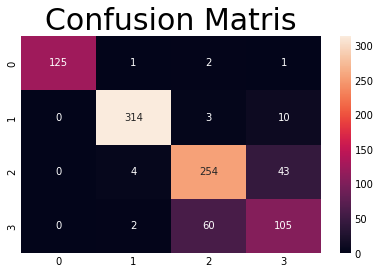

In [16]:
Y_pred_3 = eff3.predict_generator(testGen,testGen.samples // 1+1)
y_pred_3 = np.argmax(Y_pred_3, axis=1)
categories = ["0", "1","2","3"]
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(testGen.classes, y_pred_3, target_names=categories))
conf_3 = confusion_matrix(testGen.classes,y_pred_3) 
print(conf_3)
import seaborn as sns
plt.title('Confusion Matris', fontsize = 30)
sns.heatmap(conf_3, annot = True,fmt="d")
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("f1-score:",f1_score(testGen.classes, y_pred_3,average='macro'))
print("precision:",precision_score(testGen.classes, y_pred_3,average='macro'))
print("accuracy:",accuracy_score(testGen.classes, y_pred_3))
print("recall:",recall_score(testGen.classes, y_pred_3,average='macro'))

f1-score: 0.8542285972059636
precision: 0.8587021873555295
accuracy: 0.8636363636363636
recall: 0.8504583079870311


In [36]:
from tensorflow.keras.applications import EfficientNetB5
from keras.models import Model
base_model =  EfficientNetB5(weights='imagenet',input_shape=(456,456,3),include_top=False)
for layer in base_model.layers[0:150]:
  layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32,activation='relu')(x)
x = Dense(32,activation='relu')(x)
out = Dense(4,activation='softmax')(x)
eff4 = Model(inputs=base_model.inputs,outputs=out)
eff4.summary()
print(len(eff4.layers))
for layer in eff4.layers:
  print(layer.name,layer.trainable)

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 456, 456, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_6 (Rescaling)        (None, 456, 456, 3)  0           ['input_7[0][0]']                
                                                                                                  
 normalization_6 (Normalization  (None, 456, 456, 3)  7          ['rescaling_6[0][0]']            
 )                                                                                                
                                                                                            

In [37]:
from keras.callbacks import ModelCheckpoint
callback5=ModelCheckpoint(filepath="best_model_7.h5",monitor='val_loss',save_best_only=True)
eff4.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history_13=eff4.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//4,
    validation_data=valGen,
    epochs=45,
    validation_steps=valGen.samples//4,
    callbacks=callback5
)

Epoch 1/45
1841/1841 [==============================] - 350s 183ms/step - loss: 0.9816 - accuracy: 0.5934 - val_loss: 0.5787 - val_accuracy: 0.7566
Epoch 2/45
1841/1841 [==============================] - 287s 156ms/step - loss: 0.6442 - accuracy: 0.7337 - val_loss: 0.4738 - val_accuracy: 0.7959
Epoch 3/45
1841/1841 [==============================] - 283s 154ms/step - loss: 0.5806 - accuracy: 0.7541 - val_loss: 0.4782 - val_accuracy: 0.7817
Epoch 4/45
1841/1841 [==============================] - 288s 156ms/step - loss: 0.5451 - accuracy: 0.7736 - val_loss: 0.4647 - val_accuracy: 0.8166
Epoch 5/45
1841/1841 [==============================] - 287s 156ms/step - loss: 0.5111 - accuracy: 0.7801 - val_loss: 0.3985 - val_accuracy: 0.8319
Epoch 6/45
1841/1841 [==============================] - 284s 154ms/step - loss: 0.4781 - accuracy: 0.8004 - val_loss: 0.4222 - val_accuracy: 0.8395
Epoch 7/45
1841/1841 [==============================] - 287s 156ms/step - loss: 0.4708 - accuracy: 0.8087 - val_

In [26]:
eff4=keras.models.load_model('best_model_7.h5')

In [27]:
scores=eff4.evaluate(testGen,batch_size=1)
print("Loss:",scores[0])
print("Accuracy:",scores[1]*100)

924/924 [==============================] - 27s 26ms/step - loss: 0.3520 - accuracy: 0.8788
Loss: 0.35204240679740906
Accuracy: 87.87878751754761


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       129
           1       0.98      0.98      0.98       327
           2       0.84      0.82      0.83       301
           3       0.69      0.70      0.69       167

    accuracy                           0.88       924
   macro avg       0.87      0.87      0.87       924
weighted avg       0.88      0.88      0.88       924

[[125   1   3   0]
 [  1 322   0   4]
 [  0   4 248  49]
 [  1   3  46 117]]


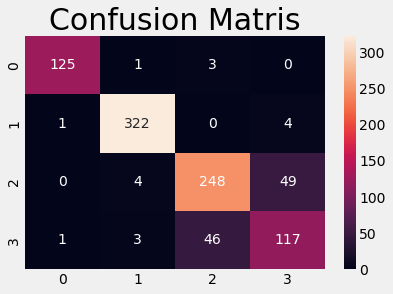

In [35]:
Y_pred_4 = eff4.predict_generator(testGen,testGen.samples // 1+1)
y_pred_4 = np.argmax(Y_pred_4, axis=1)
categories = ["0", "1","2","3"]
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(testGen.classes, y_pred_4, target_names=categories))
conf_4 = confusion_matrix(testGen.classes,y_pred_4) 
print(conf_4)
import seaborn as sns
plt.title('Confusion Matris', fontsize = 30)
sns.heatmap(conf_4, annot = True,fmt="d")
plt.show()

In [36]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("f1-score:",f1_score(testGen.classes, y_pred_4,average='macro'))
print("precision:",precision_score(testGen.classes, y_pred_4,average='macro'))
print("accuracy:",accuracy_score(testGen.classes, y_pred_4))
print("recall:",recall_score(testGen.classes, y_pred_4,average='macro'))

f1-score: 0.8701422614333439
precision: 0.8708154183489987
accuracy: 0.8787878787878788
recall: 0.8695551990900701


In [39]:
from tensorflow import keras
eff5 = keras.models.load_model('best_model_7.h5')


In [40]:
from keras.callbacks import ModelCheckpoint
callback8=ModelCheckpoint(filepath="best_model_9.h5",monitor='val_loss',save_best_only=True)
eff5.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history_15=eff5.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//4,
    validation_data=valGen,
    epochs=45,
    validation_steps=valGen.samples//4,
    callbacks=callback8
)

Epoch 1/45
1841/1841 [==============================] - 310s 161ms/step - loss: 0.2710 - accuracy: 0.8946 - val_loss: 0.3176 - val_accuracy: 0.8832
Epoch 2/45
1841/1841 [==============================] - 291s 158ms/step - loss: 0.2693 - accuracy: 0.8893 - val_loss: 0.3532 - val_accuracy: 0.8526
Epoch 3/45
1841/1841 [==============================] - 290s 157ms/step - loss: 0.2696 - accuracy: 0.8945 - val_loss: 0.2957 - val_accuracy: 0.8766
Epoch 4/45
1841/1841 [==============================] - 285s 155ms/step - loss: 0.2696 - accuracy: 0.8899 - val_loss: 0.3372 - val_accuracy: 0.8854
Epoch 5/45
1841/1841 [==============================] - 287s 156ms/step - loss: 0.2543 - accuracy: 0.8956 - val_loss: 0.3327 - val_accuracy: 0.8766
Epoch 6/45
1841/1841 [==============================] - 287s 156ms/step - loss: 0.2563 - accuracy: 0.8969 - val_loss: 0.3018 - val_accuracy: 0.8734
Epoch 7/45
1841/1841 [==============================] - 285s 155ms/step - loss: 0.2526 - accuracy: 0.8990 - val_

In [28]:
eff5 = keras.models.load_model('best_model_9.h5')

In [44]:
scores=eff5.evaluate(testGen,batch_size=1)
print("Loss:",scores[0])
print("Accuracy:",scores[1]*100)

924/924 [==============================] - 24s 26ms/step - loss: 0.3610 - accuracy: 0.8799
Loss: 0.3609655499458313
Accuracy: 87.98701167106628


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       129
           1       0.96      0.98      0.97       327
           2       0.89      0.77      0.83       301
           3       0.67      0.80      0.73       167

    accuracy                           0.88       924
   macro avg       0.88      0.88      0.88       924
weighted avg       0.89      0.88      0.88       924

[[125   2   0   2]
 [  0 321   1   5]
 [  0   9 233  59]
 [  1   3  29 134]]


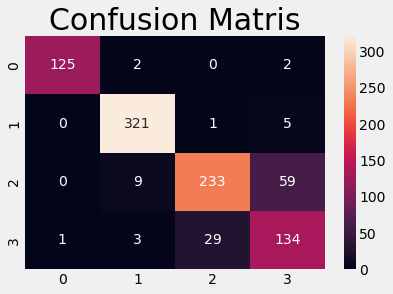

In [37]:
Y_pred_5 = eff5.predict_generator(testGen,testGen.samples // 1+1)
y_pred_5 = np.argmax(Y_pred_5, axis=1)
categories = ["0", "1","2","3"]
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(testGen.classes, y_pred_5, target_names=categories))
conf_5 = confusion_matrix(testGen.classes,y_pred_5) 
print(conf_5)
import seaborn as sns
plt.title('Confusion Matris', fontsize = 30)
sns.heatmap(conf_5, annot = True,fmt="d")
plt.show()

In [38]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("f1-score:",f1_score(testGen.classes, y_pred_5,average='macro'))
print("precision:",precision_score(testGen.classes, y_pred_5,average='macro'))
print("accuracy:",accuracy_score(testGen.classes, y_pred_5))
print("recall:",recall_score(testGen.classes, y_pred_5,average='macro'))

f1-score: 0.8766667607149025
precision: 0.8765510015556834
accuracy: 0.8798701298701299
recall: 0.881781303131796


In [42]:
from tensorflow import keras
eff6 = keras.models.load_model('best_model_9.h5')

In [48]:
from keras.callbacks import ModelCheckpoint
callback9=ModelCheckpoint(filepath="best_model_10.h5",monitor='val_loss',save_best_only=True)
eff6.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history_16=eff6.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//4,
    validation_data=valGen,
    epochs=25,
    validation_steps=valGen.samples//4,
    callbacks=callback9
)

Epoch 1/25
1841/1841 [==============================] - 327s 171ms/step - loss: 0.1735 - accuracy: 0.9386 - val_loss: 0.3162 - val_accuracy: 0.9050
Epoch 2/25
1841/1841 [==============================] - 288s 156ms/step - loss: 0.1743 - accuracy: 0.9335 - val_loss: 0.3249 - val_accuracy: 0.8919
Epoch 3/25
1841/1841 [==============================] - 284s 154ms/step - loss: 0.1682 - accuracy: 0.9382 - val_loss: 0.4139 - val_accuracy: 0.8821
Epoch 4/25
1841/1841 [==============================] - 283s 154ms/step - loss: 0.1661 - accuracy: 0.9373 - val_loss: 0.4046 - val_accuracy: 0.8755
Epoch 5/25
1841/1841 [==============================] - 284s 154ms/step - loss: 0.1566 - accuracy: 0.9435 - val_loss: 0.3571 - val_accuracy: 0.8766
Epoch 6/25
1841/1841 [==============================] - 283s 154ms/step - loss: 0.1547 - accuracy: 0.9417 - val_loss: 0.3341 - val_accuracy: 0.8766
Epoch 7/25
1841/1841 [==============================] - 283s 154ms/step - loss: 0.1567 - accuracy: 0.9393 - val_

In [32]:
eff6 = keras.models.load_model('best_model_10.h5')

In [33]:
scores=eff6.evaluate(testGen,batch_size=1)
print("Loss:",scores[0])
print("Accuracy:",scores[1]*100)

924/924 [==============================] - 28s 27ms/step - loss: 0.3923 - accuracy: 0.8734
Loss: 0.3922789692878723
Accuracy: 87.33766078948975


              precision    recall  f1-score   support

           0       0.99      0.96      0.98       129
           1       0.98      0.97      0.97       327
           2       0.83      0.83      0.83       301
           3       0.68      0.70      0.69       167

    accuracy                           0.87       924
   macro avg       0.87      0.86      0.87       924
weighted avg       0.88      0.87      0.87       924

[[124   0   4   1]
 [  1 316   0  10]
 [  0   7 250  44]
 [  0   1  49 117]]


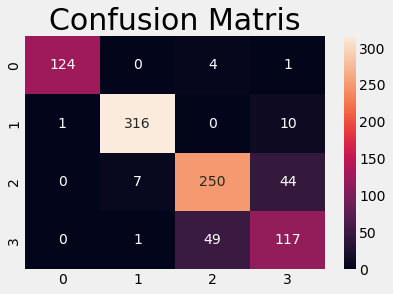

In [39]:
Y_pred_6 = eff6.predict_generator(testGen,testGen.samples // 1+1)
y_pred_6 = np.argmax(Y_pred_6, axis=1)
categories = ["0", "1","2","3"]
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(testGen.classes, y_pred_6, target_names=categories))
conf_6 = confusion_matrix(testGen.classes,y_pred_6) 
print(conf_6)
import seaborn as sns
plt.title('Confusion Matris', fontsize = 30)
sns.heatmap(conf_6, annot = True,fmt="d")
plt.show()

In [40]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("f1-score:",f1_score(testGen.classes, y_pred_6,average='macro'))
print("precision:",precision_score(testGen.classes, y_pred_6,average='macro'))
print("accuracy:",accuracy_score(testGen.classes, y_pred_6))
print("recall:",recall_score(testGen.classes, y_pred_6,average='macro'))

f1-score: 0.8663180352806119
precision: 0.8681559270914171
accuracy: 0.8733766233766234
recall: 0.8646911881987496


In [6]:
from tensorflow.keras.applications import EfficientNetB5
from keras.models import Model
base_model =  EfficientNetB5(weights='imagenet',input_shape=(456,456,3),include_top=False)
for layer in base_model.layers[0:150]:
  layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512,activation='relu')(x)
out = Dense(4,activation='softmax')(x)
eff7 = Model(inputs=base_model.inputs,outputs=out)
eff7.summary()
print(len(eff7.layers))
for layer in eff7.layers:
  print(layer.name,layer.trainable)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 456, 456, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 456, 456, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 456, 456, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                              

In [7]:
from keras.callbacks import ModelCheckpoint
callback10=ModelCheckpoint(filepath="best_model_11.h5",monitor='val_loss',save_best_only=True)
eff7.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history_7=eff7.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//4,
    validation_data=valGen,
    epochs=45,
    validation_steps=valGen.samples//4,
    callbacks=callback10
)

Epoch 1/45


2022-06-18 14:17:06.983764: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8200


1841/1841 [==============================] - 323s 159ms/step - loss: 0.8494 - accuracy: 0.6640 - val_loss: 0.5259 - val_accuracy: 0.7664
Epoch 2/45
1841/1841 [==============================] - 284s 154ms/step - loss: 0.6046 - accuracy: 0.7482 - val_loss: 0.6388 - val_accuracy: 0.6419
Epoch 3/45
1841/1841 [==============================] - 288s 157ms/step - loss: 0.5452 - accuracy: 0.7738 - val_loss: 0.4434 - val_accuracy: 0.8057
Epoch 4/45
1841/1841 [==============================] - 285s 155ms/step - loss: 0.5058 - accuracy: 0.7871 - val_loss: 0.6229 - val_accuracy: 0.7587
Epoch 5/45
1841/1841 [==============================] - 288s 156ms/step - loss: 0.4783 - accuracy: 0.8051 - val_loss: 0.4426 - val_accuracy: 0.8253
Epoch 6/45
1841/1841 [==============================] - 289s 157ms/step - loss: 0.4560 - accuracy: 0.8118 - val_loss: 0.3726 - val_accuracy: 0.8515
Epoch 7/45
1841/1841 [==============================] - 284s 154ms/step - loss: 0.4462 - accuracy: 0.8142 - val_loss: 0.386

In [5]:
from tensorflow import keras
eff8 = keras.models.load_model('best_model_11.h5')

2022-06-18 17:12:38.253791: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-18 17:12:38.904592: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-18 17:12:38.905175: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-18 17:12:38.912496: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [ ]:
from keras.callbacks import ModelCheckpoint
callback11=ModelCheckpoint(filepath="best_model_12.h5",monitor='val_loss',save_best_only=True)
eff8.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history_8=eff8.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//4,
    validation_data=valGen,
    epochs=45,
    validation_steps=valGen.samples//4,
    callbacks=callback11
)

In [8]:
scores=eff8.evaluate(testGen,batch_size=1)
print("Loss:",scores[0])
print("Accuracy:",scores[1]*100)

924/924 [==============================] - 26s 28ms/step - loss: 0.3239 - accuracy: 0.8896
Loss: 0.32388123869895935
Accuracy: 88.96104097366333


              precision    recall  f1-score   support

           0       0.99      0.96      0.98       129
           1       0.98      0.97      0.97       327
           2       0.83      0.83      0.83       301
           3       0.68      0.70      0.69       167

    accuracy                           0.87       924
   macro avg       0.87      0.86      0.87       924
weighted avg       0.88      0.87      0.87       924

[[124   0   4   1]
 [  1 316   0  10]
 [  0   7 250  44]
 [  0   1  49 117]]


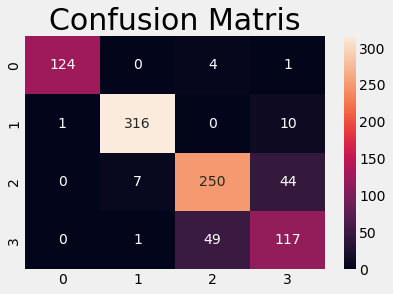

In [41]:
Y_pred_7 = eff6.predict_generator(testGen,testGen.samples // 1+1)
y_pred_7 = np.argmax(Y_pred_7, axis=1)
categories = ["0", "1","2","3"]
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(testGen.classes, y_pred_7, target_names=categories))
conf_7 = confusion_matrix(testGen.classes,y_pred_7) 
print(conf_7)
import seaborn as sns
plt.title('Confusion Matris', fontsize = 30)
sns.heatmap(conf_7, annot = True,fmt="d")
plt.show()

In [42]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("f1-score:",f1_score(testGen.classes, y_pred_6,average='macro'))
print("precision:",precision_score(testGen.classes, y_pred_6,average='macro'))
print("accuracy:",accuracy_score(testGen.classes, y_pred_6))
print("recall:",recall_score(testGen.classes, y_pred_6,average='macro'))

f1-score: 0.8663180352806119
precision: 0.8681559270914171
accuracy: 0.8733766233766234
recall: 0.8646911881987496


In [ ]:
trainDataGen=ImageDataGenerator(rescale=1./255,
    horizontal_flip=True,
    vertical_flip=False,
    rotation_range=0.3,
    zoom_range=0.1,
    shear_range=0.05,)
testDataGen=ImageDataGenerator(rescale=1./255)
valDataGen=ImageDataGenerator(rescale=1./255,validation_split=0.9999999999999)

trainGen=trainDataGen.flow_from_directory(
    trainPath,
    target_size=(224,224),
    color_mode='grayscale',
    class_mode='categorical',
    seed = 131,
    batch_size=4,
    subset='training')

testGen=testDataGen.flow_from_directory(
    testPath,
    target_size=(224,224),
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False,
    batch_size=1)

valGen=valDataGen.flow_from_directory(
    valPath,
    target_size=(224,224),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=4,
    subset='validation')

print("Test",testGen.samples)
print("Train",trainGen.samples)
print("Validation",valGen.samples)
print(testGen.class_indices) 

Found 7364 images belonging to 4 classes.
Found 924 images belonging to 4 classes.
Found 916 images belonging to 4 classes.
Test 924
Train 7364
Validation 916
{'COVID-19': 0, 'Normal': 1, 'Pneumonia-Bacterial': 2, 'Pneumonia-Viral': 3}


In [ ]:
from tensorflow.keras.applications import EfficientNetB5
from keras.models import Model
base_model =  EfficientNetB5(weights='imagenet',input_shape=(456,456,3),include_top=False)
for layer in base_model.layers[0:50]:
  layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(16,activation='relu')(x)
out = Dense(4,activation='softmax')(x)
eff9 = Model(inputs=base_model.inputs,outputs=out)
eff9.summary()
print(len(eff9.layers))
for layer in eff9.layers:
  print(layer.name,layer.trainable)

2022-06-20 23:44:39.291636: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-20 23:44:39.297074: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-20 23:44:39.297217: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-20 23:44:39.297873: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 456, 456, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 456, 456, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 456, 456, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 456, 456, 3)  0           ['normalization[0][0]']      

In [ ]:
from keras.callbacks import ModelCheckpoint
callback12=ModelCheckpoint(filepath="best_model_15.h5",monitor='val_loss',save_best_only=True)
eff9.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history=eff9.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//4,
    validation_data=valGen,
    epochs=45,
    validation_steps=valGen.samples//4,
    callbacks=callback12
)

Epoch 1/45


2022-06-20 23:45:01.720152: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8200


1841/1841 [==============================] - 437s 229ms/step - loss: 0.7514 - accuracy: 0.6976 - val_loss: 0.4847 - val_accuracy: 0.7948
Epoch 2/45
1841/1841 [==============================] - 401s 218ms/step - loss: 0.5231 - accuracy: 0.7860 - val_loss: 0.4023 - val_accuracy: 0.8504
Epoch 3/45
1841/1841 [==============================] - 402s 218ms/step - loss: 0.4923 - accuracy: 0.7966 - val_loss: 0.4952 - val_accuracy: 0.7959
Epoch 4/45
1841/1841 [==============================] - 393s 214ms/step - loss: 0.4625 - accuracy: 0.8131 - val_loss: 0.4023 - val_accuracy: 0.8406
Epoch 5/45
1841/1841 [==============================] - 375s 204ms/step - loss: 0.4307 - accuracy: 0.8225 - val_loss: 0.3625 - val_accuracy: 0.8406
Epoch 6/45
1841/1841 [==============================] - 371s 202ms/step - loss: 0.4186 - accuracy: 0.8277 - val_loss: 0.4039 - val_accuracy: 0.8319
Epoch 7/45
1841/1841 [==============================] - 371s 202ms/step - loss: 0.4054 - accuracy: 0.8345 - val_loss: 0.454

In [ ]:
scores=eff9.evaluate(testGen,batch_size=1)
print("Loss:",scores[0])
print("Accuracy:",scores[1]*100)

924/924 [==============================] - 22s 24ms/step - loss: 0.3649 - accuracy: 0.8994
Loss: 0.3648870289325714
Accuracy: 89.9350643157959


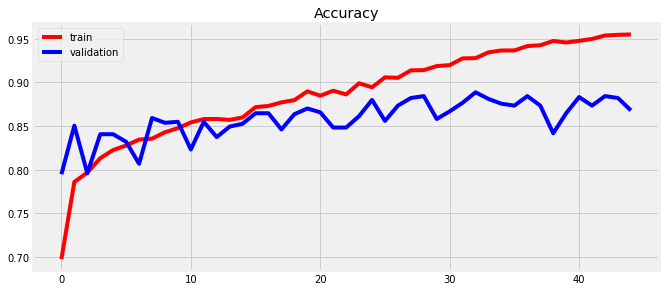

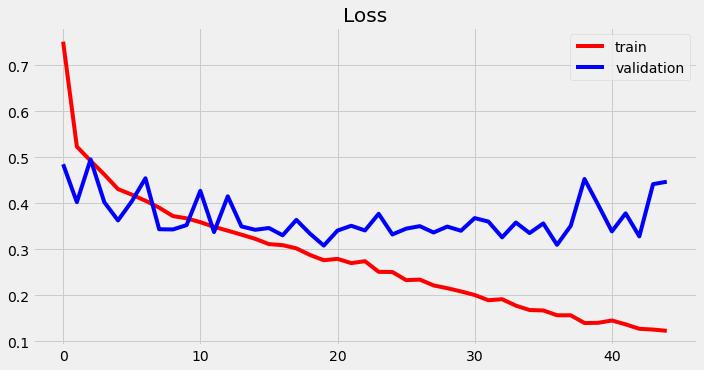

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"],color='r',label='train')
plt.plot(history.history["val_accuracy"],color='b',label='validation')
plt.legend(loc='best')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"],color='r',label='train')
plt.plot(history.history["val_loss"],color='b',label='validation')
plt.legend(loc='best')
plt.tight_layout()

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       129
           1       0.94      0.99      0.97       327
           2       0.85      0.89      0.87       301
           3       0.84      0.65      0.73       167

    accuracy                           0.90       924
   macro avg       0.90      0.88      0.89       924
weighted avg       0.90      0.90      0.90       924

[[129   0   0   0]
 [  0 324   1   2]
 [  2  11 269  19]
 [  2   8  48 109]]


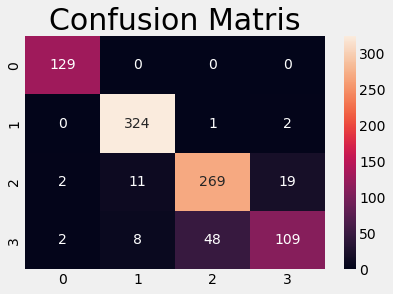

In [ ]:
Y_pred_8 = eff9.predict_generator(testGen,testGen.samples // 1+1)
y_pred_8 = np.argmax(Y_pred_8, axis=1)
categories = ["0", "1","2","3"]
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(testGen.classes, y_pred_8, target_names=categories))
conf_8 = confusion_matrix(testGen.classes,y_pred_8) 
print(conf_8)
import seaborn as sns
plt.title('Confusion Matris', fontsize = 30)
sns.heatmap(conf_8, annot = True,fmt="d")
plt.show()

In [ ]:
from tensorflow.keras.applications import EfficientNetB5
from keras.models import Model
base_model =  EfficientNetB5(weights='imagenet',input_shape=(456,456,3),include_top=False)
for layer in base_model.layers[0:50]:
  layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64,activation='relu')(x)
out = Dense(4,activation='softmax')(x)
eff10 = Model(inputs=base_model.inputs,outputs=out)
eff10.summary()
print(len(eff10.layers))
for layer in eff10.layers:
  print(layer.name,layer.trainable)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 456, 456, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 456, 456, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 456, 456, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                            

In [ ]:
from keras.callbacks import ModelCheckpoint
callback13=ModelCheckpoint(filepath="best_model_18.h5",monitor='val_loss',save_best_only=True)
eff10.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history=eff10.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//4,
    validation_data=valGen,
    epochs=70,
    validation_steps=valGen.samples//4,
    callbacks=callback13
)

Epoch 1/70
1841/1841 [==============================] - 417s 219ms/step - loss: 0.7279 - accuracy: 0.7080 - val_loss: 0.5482 - val_accuracy: 0.7511
Epoch 2/70
1841/1841 [==============================] - 401s 218ms/step - loss: 0.5423 - accuracy: 0.7782 - val_loss: 0.8455 - val_accuracy: 0.6965
Epoch 3/70
1841/1841 [==============================] - 404s 219ms/step - loss: 0.4837 - accuracy: 0.7941 - val_loss: 0.4629 - val_accuracy: 0.8057
Epoch 4/70
1841/1841 [==============================] - 405s 220ms/step - loss: 0.4592 - accuracy: 0.8152 - val_loss: 0.4029 - val_accuracy: 0.8275
Epoch 5/70
1841/1841 [==============================] - 400s 217ms/step - loss: 0.4217 - accuracy: 0.8201 - val_loss: 0.4157 - val_accuracy: 0.8308
Epoch 6/70
1841/1841 [==============================] - 405s 220ms/step - loss: 0.4091 - accuracy: 0.8285 - val_loss: 0.3878 - val_accuracy: 0.8275
Epoch 7/70
1841/1841 [==============================] - 401s 218ms/step - loss: 0.4092 - accuracy: 0.8293 - val_

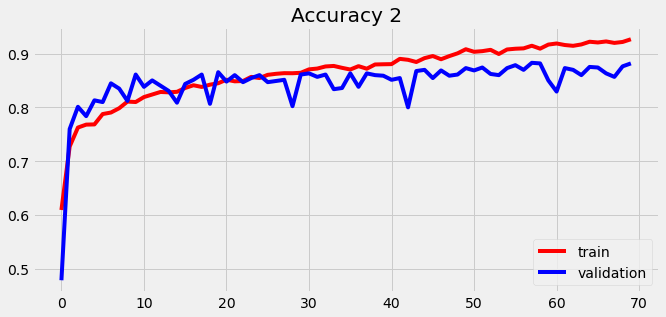

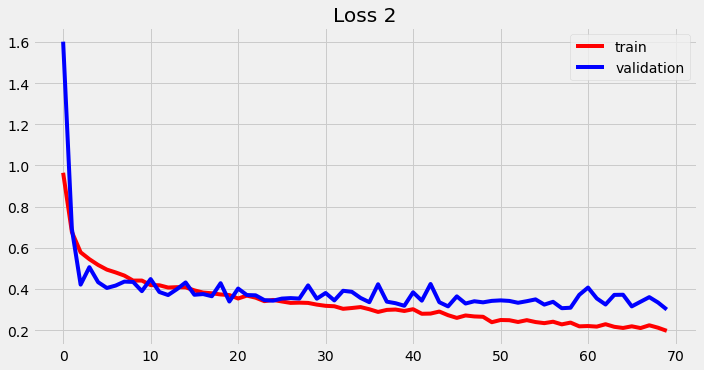

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title("Accuracy 2")
plt.plot(history.history["accuracy"],color='r',label='train')
plt.plot(history.history["val_accuracy"],color='b',label='validation')
plt.legend(loc='best')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.subplot(212)
plt.title("Loss 2")
plt.plot(history.history["loss"],color='r',label='train')
plt.plot(history.history["val_loss"],color='b',label='validation')
plt.legend(loc='best')
plt.tight_layout()

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       129
           1       0.97      0.98      0.98       327
           2       0.88      0.84      0.86       301
           3       0.74      0.77      0.75       167

    accuracy                           0.90       924
   macro avg       0.89      0.90      0.90       924
weighted avg       0.90      0.90      0.90       924

[[129   0   0   0]
 [  0 322   1   4]
 [  0   8 252  41]
 [  1   3  35 128]]


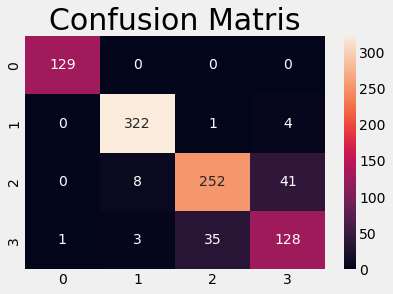

In [ ]:
Y_pred_9 = eff3.predict_generator(testGen,testGen.samples // 1+1)
y_pred_9 = np.argmax(Y_pred_9, axis=1)
categories = ["0", "1","2","3"]
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(testGen.classes, y_pred_9, target_names=categories))
conf_9 = confusion_matrix(testGen.classes,y_pred_9) 
print(conf_9)
import seaborn as sns
plt.title('Confusion Matris', fontsize = 30)
sns.heatmap(conf_9, annot = True,fmt="d")
plt.show()

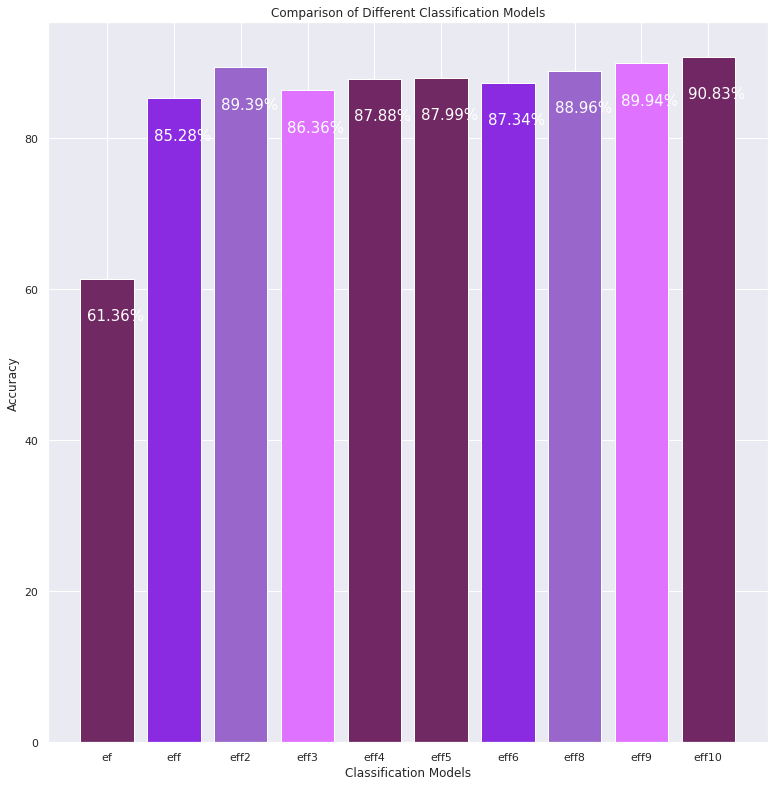

In [11]:
sns.set()
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
Models = ['ef','eff', 'eff2','eff3','eff4','eff5','eff6','eff8','eff9','eff10']
ef=61.36363744735718
eff=85.28138399124146 
eff2=89.39393758773804
eff3=86.36363744735718
eff4=87.87878751754761 
eff5=87.98701167106628 
eff6=87.33766078948975
eff8=88.96104097366333
eff9=89.9350643157959
eff10=90.83
Accuracy=[ef,eff,eff2,eff3,eff4,eff5,eff6,eff8,eff9,eff10]
ax.bar(Models,Accuracy,color=['#702963','#8a2be2','#9966cc','#df73ff','#702763']);
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-5.5, str(round(i.get_height(),2))+'%', fontsize=15, color='white')
plt.title('Comparison of Different Classification Models')
plt.ylabel('Accuracy')
plt.xlabel('Classification Models')
plt.show()